✅ Loaded dataset with shape: (147896, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147896 entries, 0 to 147895
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   account_id                   147896 non-null  object 
 1   account_name                 147896 non-null  object 
 2   industry                     147896 non-null  object 
 3   country                      147896 non-null  object 
 4   signup_date                  147896 non-null  object 
 5   referral_source              147896 non-null  object 
 6   account_plan_tier            147896 non-null  object 
 7   account_seats                147896 non-null  int64  
 8   account_is_trial             147896 non-null  int64  
 9   account_churn_flag           147896 non-null  int64  
 10  subscription_id              147896 non-null  object 
 11  start_date                   147896 non-null  object 
 12  end_date        

,account_id,account_name,industry,country,signup_date,referral_source,account_plan_tier,account_seats,account_is_trial,account_churn_flag,...,satisfaction_score,escalation_flag,churn_event_id,churn_date,reason_code,refund_amount_usd,preceding_downgrade_flag,preceding_upgrade_flag,is_reactivation,feedback_text
0,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,0,0,...,3.0,0.0,C-695fcd,2024-11-23,budget,0.0,0.0,0.0,0.0,switched to competitor
1,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,0,0,...,3.0,0.0,C-cea92d,2024-12-05,competitor,0.0,0.0,1.0,0.0,NaN
2,A-2e4581,Company_0,EdTech,US,2024-10-16,partner,Basic,9,0,0,...,NaN,0.0,C-695fcd,2024-11-23,budget,0.0,0.0,0.0,0.0,switched to competitor


Categorical columns: 23
Numerical columns: 22
Target column confirmed: account_churn_flag
account_churn_flag
0    0.775525
1    0.224475
Name: proportion, dtype: float64


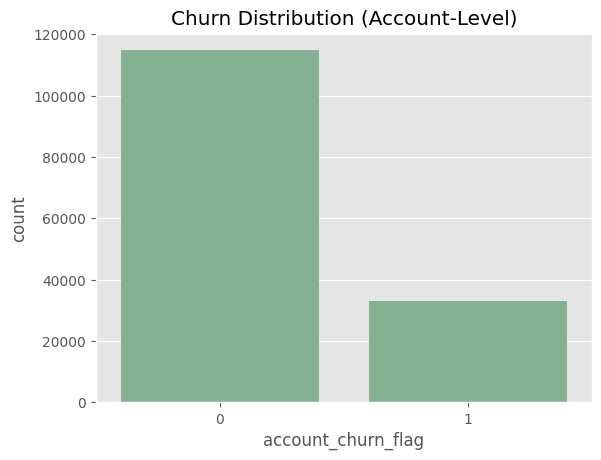

Total Columns with Missing Values: 24 out of 45 total columns

🔹 Missing Value Summary (Columns with Missing Data):


,Column,Missing_Count,Missing_%
12,end_date,133296,90.128198
35,satisfaction_score,62723,42.410207
44,feedback_text,58601,39.623114
37,churn_event_id,29841,20.177016
40,refund_amount_usd,29841,20.177016
38,churn_date,29841,20.177016
39,reason_code,29841,20.177016
41,preceding_downgrade_flag,29841,20.177016
42,preceding_upgrade_flag,29841,20.177016
43,is_reactivation,29841,20.177016


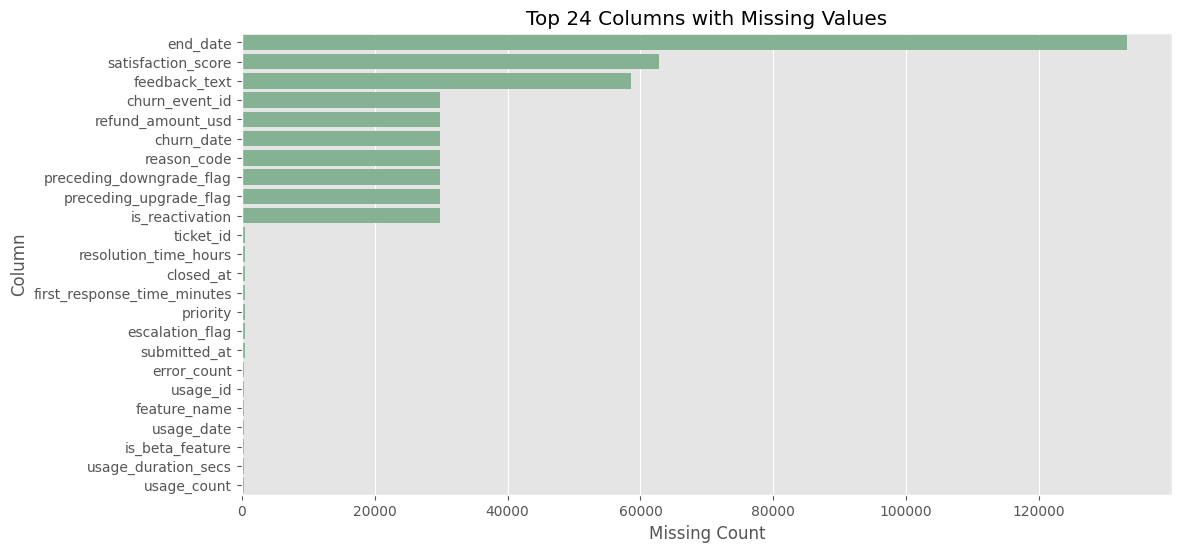

In [8]:
# =========================================================
# 1️⃣ IMPORTS & SETUP
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("crest")

# Path to your merged dataset
df = pd.read_csv("../data/processed/merged_customer_data.csv")

print(f"✅ Loaded dataset with shape: {df.shape}")
df.info()

# =========================================================
# 2️⃣ BASIC OVERVIEW
# =========================================================
display(df.head(3))

# Column categories
object_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print(f"Categorical columns: {len(object_cols)}")
print(f"Numerical columns: {len(num_cols)}")

# =========================================================
# 3️⃣ TARGET VARIABLE CHECK
# =========================================================
target_col = "account_churn_flag"

if target_col not in df.columns:
    print("⚠️ Target column not found! Check your column names again.")
else:
    print(f"Target column confirmed: {target_col}")
    print(df[target_col].value_counts(normalize=True))
    sns.countplot(x=target_col, data=df)
    plt.title("Churn Distribution (Account-Level)")
    plt.show()
# =========================================================
# 4️⃣ MISSING VALUE ANALYSIS (Final Enhanced Version)
# =========================================================
# Compute missing count and percentage for all columns
missing_df = (
    df.isna()
      .sum()
      .reset_index()
      .rename(columns={'index': 'Column', 0: 'Missing_Count'})
)
missing_df['Missing_%'] = (missing_df['Missing_Count'] / len(df)) * 100
missing_df = missing_df.sort_values(by='Missing_Count', ascending=False)

# Filter columns with missing values only
missing_nonzero = missing_df[missing_df['Missing_Count'] > 0]

# Print total number of columns with missing values
print(f"Total Columns with Missing Values: {missing_nonzero.shape[0]} out of {df.shape[1]} total columns\n")

# Display the detailed missing summary table
print("🔹 Missing Value Summary (Columns with Missing Data):")
display(missing_nonzero.style.background_gradient(subset=['Missing_Count', 'Missing_%'], cmap='YlOrRd'))

# Plot the top 25 columns with missing values
plt.figure(figsize=(12,6))
sns.barplot(x=missing_nonzero['Missing_Count'][:24], y=missing_nonzero['Column'][:24])
plt.title("Top 24 Columns with Missing Values")
plt.xlabel("Missing Count")
plt.ylabel("Column")
plt.show()






Total Columns with Missing Values: 24
Categorical Columns with Missing Values: 12
Numeric Columns with Missing Values: 12



,Categorical Columns (Missing)
0,end_date
1,usage_id
2,usage_date
3,feature_name
4,ticket_id
5,submitted_at
6,closed_at
7,priority
8,churn_event_id
9,churn_date


,Numeric Columns (Missing)
0,usage_count
1,usage_duration_secs
2,error_count
3,is_beta_feature
4,resolution_time_hours
5,first_response_time_minutes
6,satisfaction_score
7,escalation_flag
8,refund_amount_usd
9,preceding_downgrade_flag


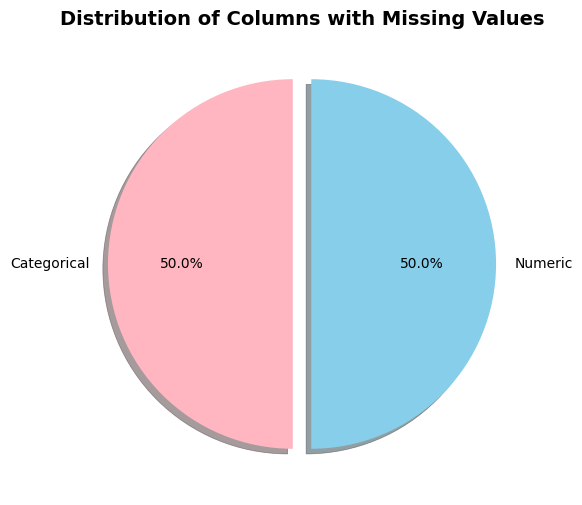

In [10]:
# =========================================================
# 5️⃣ CLASSIFY COLUMNS (With Missing Values)
# =========================================================
# Identify columns with missing values
missing_cols = df.columns[df.isna().any()].tolist()

# Separate categorical and numeric among them
cat_missing = df[missing_cols].select_dtypes(include=['object', 'category']).columns.tolist()
num_missing = df[missing_cols].select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print summary
print(f"Total Columns with Missing Values: {len(missing_cols)}")
print(f"Categorical Columns with Missing Values: {len(cat_missing)}")
print(f"Numeric Columns with Missing Values: {len(num_missing)}\n")

# Display them as DataFrames
display(pd.DataFrame({'Categorical Columns (Missing)': cat_missing}))
display(pd.DataFrame({'Numeric Columns (Missing)': num_missing}))

# =========================================================
# 📊 Visualization: Pie chart for column-type distribution
# =========================================================
plt.figure(figsize=(6,6))
plt.pie(
    [len(cat_missing), len(num_missing)],
    labels=['Categorical', 'Numeric'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FFB6C1', '#87CEEB'],
    explode=(0.05, 0.05),
    shadow=True
)
plt.title("Distribution of Columns with Missing Values", fontsize=14, fontweight='bold')
plt.show()



/tmp/ipykernel_126489/3465613229.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(handling_strategy.keys()), y=list(handling_strategy.values()), palette="coolwarm")


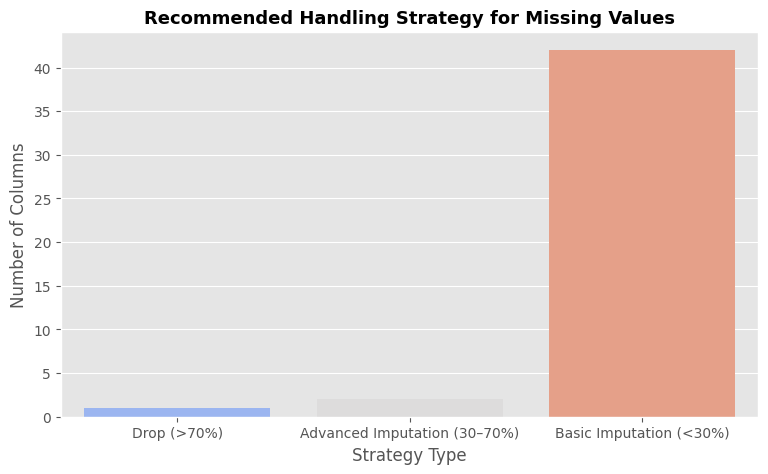

In [12]:
# =========================================================
# 6️⃣ MISSING VALUE HANDLING STRATEGY PLOT
# =========================================================
handling_strategy = {
    "Drop (>70%)": len([c for c in missing_df[missing_df['Missing_%'] > 70]['Column']]),
    "Advanced Imputation (30–70%)": len([c for c in missing_df[(missing_df['Missing_%'] > 30) & (missing_df['Missing_%'] <= 70)]['Column']]),
    "Basic Imputation (<30%)": len([c for c in missing_df[missing_df['Missing_%'] <= 30]['Column']])
}

plt.figure(figsize=(9,5))
sns.barplot(x=list(handling_strategy.keys()), y=list(handling_strategy.values()), palette="coolwarm")
plt.title("Recommended Handling Strategy for Missing Values", fontsize=13, fontweight='bold')
plt.ylabel("Number of Columns")
plt.xlabel("Strategy Type")
plt.show()


In [13]:
# =========================================================
# 📋 Recommended Missing Value Handling Strategy
# =========================================================
missing_value_strategy = {
    # 🔹 Categorical Columns
    'end_date': 'Drop (90% missing, low recovery potential)',
    'usage_id': 'Fill with mode (very few missing)',
    'usage_date': 'Fill with mode (very few missing)',
    'feature_name': 'Fill with mode (very few missing)',
    'ticket_id': 'Fill with mode (very few missing)',
    'submitted_at': 'Fill with mode (very few missing)',
    'closed_at': 'Fill with mode (very few missing)',
    'priority': 'Fill with mode (very few missing)',
    'churn_event_id': 'Add "Unknown" category (20% missing)',
    'churn_date': 'Add "Unknown" category (20% missing)',
    'reason_code': 'Add "Unknown" category (20% missing)',
    'feedback_text': 'Keep — replace NaN with empty string ("")',

    # 🔹 Numeric Columns
    'usage_count': 'Mean/median imputation (<1%)',
    'usage_duration_secs': 'Mean/median imputation (<1%)',
    'error_count': 'Mean/median imputation (<1%)',
    'is_beta_feature': 'Mode imputation (binary flag, <1%)',
    'resolution_time_hours': 'Median imputation (<1%)',
    'first_response_time_minutes': 'Median imputation (<1%)',
    'satisfaction_score': 'Advanced imputation (Regression/KNN, 42%)',
    'escalation_flag': 'Mode imputation (binary, <1%)',
    'refund_amount_usd': 'Mean/median imputation (20%)',
    'preceding_downgrade_flag': 'Mode imputation (binary, 20%)',
    'preceding_upgrade_flag': 'Mode imputation (binary, 20%)',
    'is_reactivation': 'Mode imputation (binary, 20%)'
}

# Display strategy neatly
import pandas as pd
strategy_df = pd.DataFrame(list(missing_value_strategy.items()), columns=['Column', 'Recommended Handling'])
display(strategy_df.style.set_properties(**{'text-align': 'left'}))


,Column,Recommended Handling
0,end_date,"Drop (90% missing, low recovery potential)"
1,usage_id,Fill with mode (very few missing)
2,usage_date,Fill with mode (very few missing)
3,feature_name,Fill with mode (very few missing)
4,ticket_id,Fill with mode (very few missing)
5,submitted_at,Fill with mode (very few missing)
6,closed_at,Fill with mode (very few missing)
7,priority,Fill with mode (very few missing)
8,churn_event_id,"Add ""Unknown"" category (20% missing)"
9,churn_date,"Add ""Unknown"" category (20% missing)"


In [ ]:
# =========================================================
#  NUMERIC DISTRIBUTIONS
# =========================================================
num_sample = [
    "mrr_amount", "arr_amount", 
    "upgrade_flag", "downgrade_flag", 
    "avg_usage_count" if "avg_usage_count" in df.columns else "account_seats"
]

for col in num_sample:
    if col in df.columns:
        plt.figure(figsize=(6,3))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

# =========================================================
#  CORRELATION HEATMAP
# =========================================================
num_for_corr = [c for c in num_cols if df[c].nunique() > 5]
corr = df[num_for_corr + [target_col]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap with Target")
plt.show()

# =========================================================
#  CATEGORICAL CHURN PATTERNS
# =========================================================
cat_inspect = ["industry", "subscription_plan_tier", "country", "account_plan_tier"]

for col in cat_inspect:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.barplot(x=col, y=target_col, data=df, estimator=np.mean, errorbar=None)
        plt.title(f"Average Churn Rate by {col}")
        plt.xticks(rotation=45)
        plt.show()

# =========================================================
#  SUPPORT / REFUND RELATIONSHIPS
# =========================================================
cols_check = [
    ("resolution_time_hours", "satisfaction_score"),
    ("refund_amount_usd", "account_churn_flag"),
]

for col_x, col_y in cols_check:
    if col_x in df.columns and col_y in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=col_y, y=col_x, data=df)
        plt.title(f"{col_x} vs {col_y}")
        plt.show()

# =========================================================
#  SUMMARY INSIGHTS
# =========================================================
if target_col in df.columns:
    print("Average MRR by churn status:")
    print(df.groupby(target_col)["mrr_amount"].mean())

    print("\nAverage satisfaction score by churn status:")
    col_sat = "satisfaction_score" if "satisfaction_score" in df.columns else "avg_satisfaction"
    if col_sat in df.columns:
        print(df.groupby(target_col)[col_sat].mean())

# =========================================================
# 🔍  INSIGHT SNAPSHOT
# =========================================================
print("""
✅ Quick Insights Snapshot
------------------------------------------
1. Check if churners have higher refund amounts or lower satisfaction.
2. Examine whether specific plan tiers (e.g., Basic) show higher churn.
3. Confirm if 'resolution_time_hours' correlates positively with churn.
4. Identify top missing-value columns for next cleaning steps.
5. Flag which numeric features have very low variance (uninformative).
""")



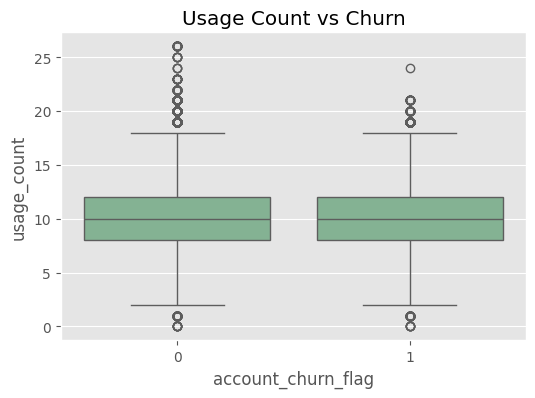

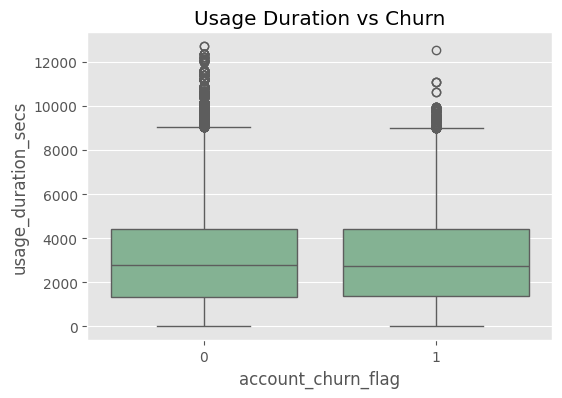

In [4]:
# =========================================================
# 🔹 1️⃣ Usage Behavior Patterns vs Churn
# =========================================================
plt.figure(figsize=(6,4))
sns.boxplot(x="account_churn_flag", y="usage_count", data=df)
plt.title("Usage Count vs Churn")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="account_churn_flag", y="usage_duration_secs", data=df)
plt.title("Usage Duration vs Churn")
plt.show()


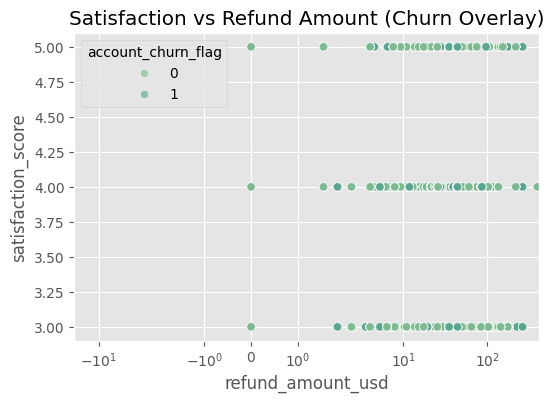

In [5]:
# =========================================================
# 🔹 2️⃣ Satisfaction vs Refund Interaction
# =========================================================
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="refund_amount_usd", 
    y="satisfaction_score", 
    hue="account_churn_flag", 
    data=df, 
    alpha=0.6
)
plt.title("Satisfaction vs Refund Amount (Churn Overlay)")
plt.xscale("symlog")
plt.show()


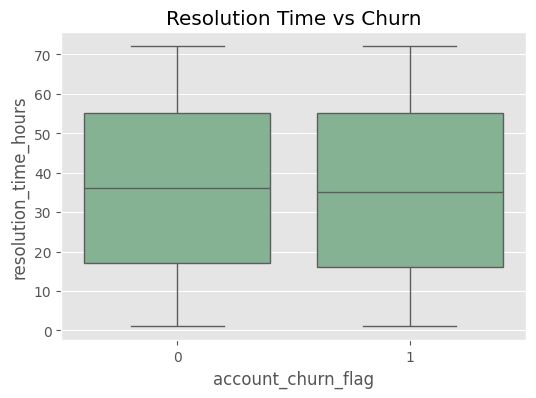

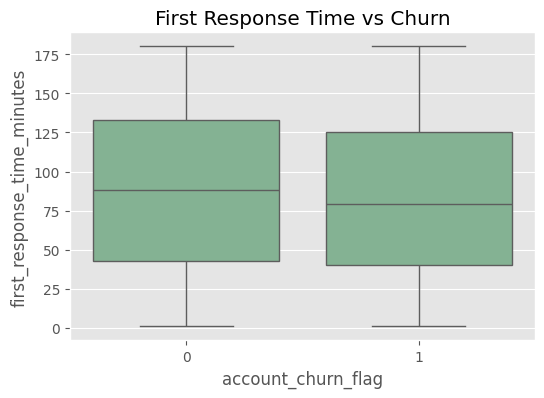

In [6]:
# =========================================================
# 🔹 3️⃣ Support Responsiveness Impact
# =========================================================
plt.figure(figsize=(6,4))
sns.boxplot(x="account_churn_flag", y="resolution_time_hours", data=df)
plt.title("Resolution Time vs Churn")
plt.show()

if "first_response_time_minutes" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="account_churn_flag", y="first_response_time_minutes", data=df)
    plt.title("First Response Time vs Churn")
    plt.show()


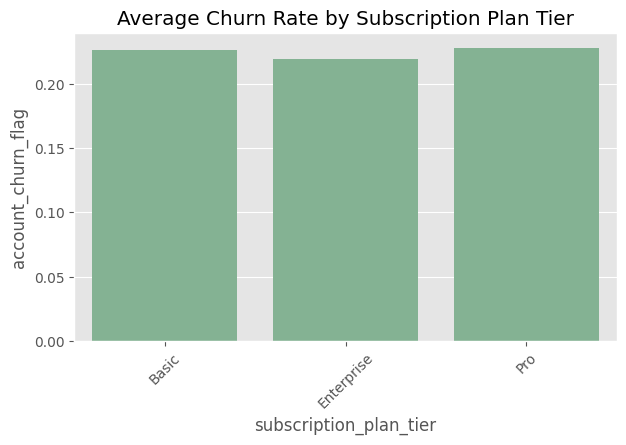

In [7]:
# =========================================================
# 🔹 4️⃣ Plan Tier Influence
# =========================================================
plt.figure(figsize=(7,4))
sns.barplot(x="subscription_plan_tier", y="account_churn_flag", data=df, estimator=np.mean, errorbar=None)
plt.title("Average Churn Rate by Subscription Plan Tier")
plt.xticks(rotation=45)
plt.show()


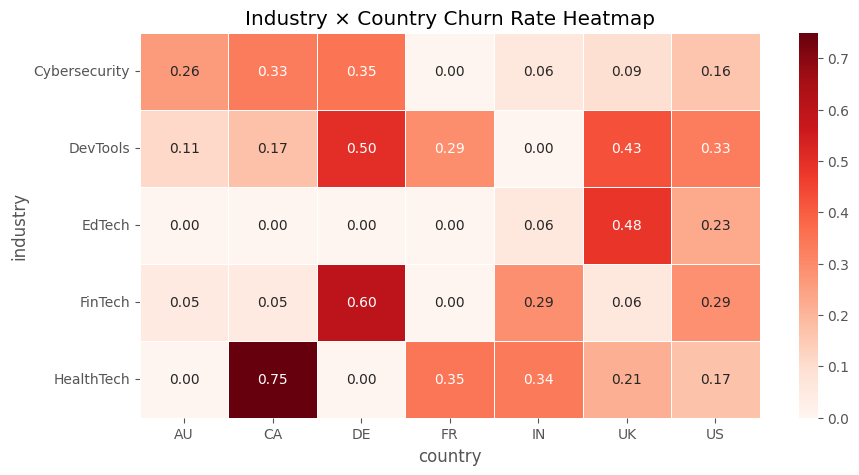

In [8]:
# =========================================================
# 🔹 5️⃣ Industry–Country Interaction
# =========================================================
if "industry" in df.columns and "country" in df.columns:
    pivot = df.pivot_table(index="industry", columns="country", values="account_churn_flag", aggfunc="mean")
    plt.figure(figsize=(10,5))
    sns.heatmap(pivot, cmap="Reds", linewidths=0.5, annot=True, fmt=".2f")
    plt.title("Industry × Country Churn Rate Heatmap")
    plt.show()


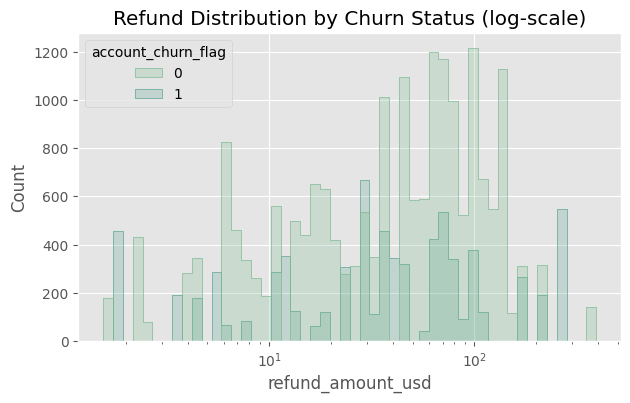

In [9]:
# =========================================================
# 🔹 6️⃣ Refund Distribution (Active vs Churned)
# =========================================================
plt.figure(figsize=(7,4))
sns.histplot(
    data=df, 
    x="refund_amount_usd", 
    hue="account_churn_flag", 
    bins=50, 
    element="step", 
    log_scale=True
)
plt.title("Refund Distribution by Churn Status (log-scale)")
plt.show()


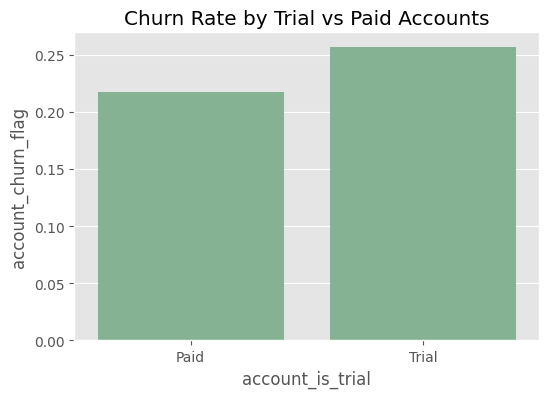

In [10]:
# =========================================================
# 🔹 7️⃣ Trial Conversion Behavior
# =========================================================
plt.figure(figsize=(6,4))
sns.barplot(x="account_is_trial", y="account_churn_flag", data=df, estimator=np.mean, errorbar=None)
plt.title("Churn Rate by Trial vs Paid Accounts")
plt.xticks([0,1], ["Paid", "Trial"])
plt.show()
